In [7]:
import PIL
from io import BytesIO
import base64
from IPython.display import Markdown

In [8]:
b64 = """iVBORw0KGgoAAAANSUhEUgAAAMoAAADKCAYAAADkZd+oAABNNklEQVR4nOz9CZgd1Xkmjr/nVNXdb++LutXd2hFaEAghhBBg2Y5t8L6JeImBbHjGiXHsfxInmcmkPRP/Zya2gx2ymThe8SSGJDaOY7zERgZLIECgBe1C6lbv6+3bd6/lfL/nnKrbun3VLbVEt4S6632e6tv31naq6rz1rec7HD58+Lgg9CvdAB9nsfWTj4Zt5LYRsSbN4Y/veejXxq90m3y4YFe6AT6ATfd/OaJFgq8H+N0AvYeAAAP2MOChcFXb93a2v96+0m1c6PCJcgWx6f4vGzwSWMfAfgdg9wJMB6j0mVhEeJlDfLrS0Hb/5PP3ZK5gcxc0fKJcIUg1iyh/l4D4K4A3lxGkDJQEY39DhfBDz//t3f2Xs50+XPhEuQLY8on/10jM/HNXisAoXScfCOcCjjjHz+IA7Agx8YHnH7zv0GVtsA9oV7oBCwrt7XzzxnuWEegLjNivgZ29/wYXWFUzjHetOYzfvHEvIoaFzmQ1LGdiE8mcWgZ2Z+uWd+W79zz+4hW7jgUIX6JcJmz7w3+M26a+gxg+C0Jj6b0P6TZuW9KBj1z/IlbXDgOMULB1PNvdhr/cfTsG0rGSIzECKAXgGxXZ8J/+58N3J6/MFS0s+BLlMmDdJ79Sozv6bxPYgwAqiyRhINRFsvjIDS/hgS27UR/NgDF3pc4F2irHcMeS0xjLh9ExVgMq7gYEQbi+YNg3Lr71vcd7nv1u75W+xvkOX6LMIXbseFTrbMitgIE/APAbnvqkwBlhWXUC/+11P8faukEwKSimQc4ysLNjOb747DaM5cKlqxwAXcTo088/eN+jc3w5Cxo+UeYIEyTR6ZNg7P5SkoR0C9uXnsLv3/Y0YoHCjB6CtFVeHlyELz57K44ONZSsYQQmxpmDv7WNwF/u/cKHhufmihY2fNVrDiBJcrp1fAPn/Jtg7G1FkkhCVIXyeP+6l/GxLc8iFjBn/KbSOKEhmsGGRf3oHa9A93hlcZVU1kJg7GZOdFvTLe893fvsdzvm7OIWKHyizDIkSToWZ67jpP8DwG4slSQ14Sz+y8178OEN+xDUnIs+tlTXJNFuau5Bxgzg2Eh96WodQCsHvbn1lvcc6X72eydn6ZJ8+KrX7GLbb/xj3K7gO4j4g2CIF++vxgVW1IzigS27sKm5R3X4VwO593g+hK+/tAnfObShLObCiDFKE+GRTFX49w61322+2uvy4UuUWQKxzR9bukhEtAcAfAaMVZSSZE3dIP7H9p9hXf3gqyYJvAOHdFupYU3xFE6O1iJtBktXyy/rjLy9oumW9+3pe/a76Vd90gUOnyizgC0fX9UCA/8LwAPKXvCg4iNtHfi9rbuxvGZUuX6nQ8HW8UzXEnxu1+vwi47lSjVbUjV23vMampRUI7iucQB7upcgYwUmrWbAGg6xcdGW9z7Vt+e7frzlVcBXvV4F3KTG2DpG9h+A4QOl9kg0YOKulcfwwNZd0BhhKBPFcDaK1XVDCJTZJ4IYXhmtxSd/9Da1jc4I6xr68eBdP1AR+nJYQsPJ0RpFpuXVo0r1OjZchz/66V0YyMTKtmY2GB3kFHjvs1/8oG/kXyJ8iXKJkCTRopFbGJyvg2H7Wc+Wa3C/7Zpj+K83P6tiIN87ug7tO9+EpzqXozqcwzW1kz24o/kI/v75LTg0uAhRw1Lq2VA2hv50HK9benrSttKIf2T/Rvzvp16vYivN8XG0VIyjIZbBtrYO7O1tQSI/KdbCCdQIiPe13PKe8UV33nWsb+cPzmWfj/PCJ8rFg938O9+o1ULGvYD4S4AtL5UkTfE0Prn1l/jV9QdUZ//87jvwr4fWI2cbSgJIu2Jt/eCkAw5mYvjSs7chGrDwgev2YWlVAvsHmiCI491rDoGXyH3TcVNbXupvRsYM4unOZXh5sBEbGgfQXDGOmxZ3K4l1cGDR2Qa78X5pN72RF/TIhg/d//TJJ7598W63BQx/KPBF4sZPfmsFGfgqgR4EeEtRfdW5wIbGPnz2jT/G7Uvkm30xPvbv78YvO5fCIS7f4INTHW+8EMSPT16j1K+1DQN497WH8aYVJxA1TAxnI2rddCAAeS8n7P7vvwf7+poVyX7zxudx/6bnylQ8lcYfA+H3Rk4N/WTzJ7+9fA5uz7yFL1FmiHUf+5vY0lvf/x4N7CsMuMWLWyiSxIMFvHP1EfzulmdQF83ie0fX4vO/fJ3K0aoO5/GuNYe5IATSZki7sbl3kkQZzUXwrf0bkTJDuKWlC60V48haAWWrdCarYXBHqV9FR4DlaCp+8mLfYqXG/a83/hRHhxuUmibVrupQDmsbBtWysmYUpxM15aqYTqBWQHx48S3vXtK04a5dfXt/ULjc9/Nqg0+UC4GIbR6/ZnlA0/+cgf93MJX5OyGJZWeVataHNuxDQBf4t8Pr8U8Hr0eqEEJTfByf2LoLGxr72Y9OXKtJo/vmli5cWzek9pVSpCtZha+8uFmpVIcHG/D4sbV44sRqRRJbaMjZAbxj9ZEJ6aAxgqE5+OGJ1QjqDt5+zVG8ZcVx9KYqcXy4Dnv7WiZsm9bKMWxe3IO+VAW6x6smLkmqYgwsysCu5wFj46INd/6HT5bzwyfK+dDezjd9v2M9F/R3YHg3mIpPTKTwLq4YV1LkndceRiIXwUN7bsW/HVmvDHhpZP/+tqexrfWM6qj//PL1qItm8Ns3Pa9SV6BUJ6Ykx+NH1018l3aJXLxMYcQDBbx37aEJokhDXxKkY6xGpbJcUzuCW9vOYHNLNw4PNaJzrBqdY1VKKm1c1IfaSBbb2jrhgCvPmiUmPXIpFZfygHH9og13/tAny/Tw3cPnwaZPfLNNY/RnAO4rlSLSHrlhUS/+dPvPURfJoDdVga++eJOyJ+S6zYu7FEkWxVJSIGFffxM+8cN3qKj8/37Tjya5fG3BkTobLDwHnAlUBCcnTmYtA48dug7/8MIWbGnpwhfu/IGyVxK5MB5+YYtqB2OED163X41xCem2itO82N+ML+y6XUmxSWCQzP1PJ5P/0N6HP+rHW6aAb8xPg03/v/9XpzPxYUb4UPl9qgln8eaVJ9AQTSs1p5QkNy3uxh/e9pRSu+TbP2MZykNlaAKL4ulz4iJyH2lXTLdUBqfOLuYMcIhhMBNFMh9W29SEc/jdLbvx6ze+AEtwfHv/DfjcL1+n7JqgbuP6xj5sXtx97sEIARC269HQfbN+I+cJfKJMgXXtjwY0295EYPcTQ6h0nezYy6tH8cblr6AvHVf2xU9OXqNSVTY29eKP73gSjbHUROeWb/KORLUKQN68uGtW2ifPJUkqbZyRXAQjJWNUpFr3/rUv42Ob9yiX9M9Pr8A39t+oJJeULO9b+7LafwqECPjYlge+vWpWGjnP4BNlCsTHMs2AkJJkCTy7IGxYiiQh3ZpILdnVuRQ/OeGS5ObF3WoQVn0kM0kCyM56bLheBSJnI89LQtora+sH1P9Eyt8waX3EMPGuaw/jT+54Uqlp/3zwevzoxGp1fmk7vWHZK1I1EzXhTGfJbtIwWiqY/Xuz0sh5Br9S5BSwhRbjnFYVbbimeApvWn4CPzi+BgVbUx3OdDSldkn1B8RUYuJDz27DKi/qLg36lwcbMJCOoy8VV96x2QLzxqcENQfJQgh/+JO7ENQm18gjMEVSCUdw2MQn9pWE17ngm1u6244ONqLzrM2iMcau23T/l429D3/Uj96XwCdKGTb8/jej3KFNIGwp/iZtktuWdOAHx6+d2C6g2VhWPYrVdcPKLTuYjuHnmRV48vTZOJ5UjaQMCeu2sl02NPZd8Pw5W8eJkfoLblsVyuPejXtVqn3PeMXUbhliitRSFWypmJxgKTeP6jZ737qDqoCFBw2gGygakZLUH89SAp8oZTBsVkGg9cxTS2WH3NzcrWIXpZA2x1tXHcMbl59U7t89Pa04MNCEZN71YMm39uL4ODY1d2NTU68KSurTDNaShveJ4ToVQ3m2q02lzK+uG8K6hgG845ojaJsii1iqV/dc/yLuXHkcL/QuVhH6p90sALVeqmfbWjtRGcqrYcfF9ktJM5oLQ2MC1y/qxda2M/jHFzcjmfdMMYKhQb0kfKKUwCdKGYRtMk3XJ2w32cHXNQ6olJKVNSN4rqdVdcx9fU3Y2NSHiGfcL6lK4P1rD561F5ir9HNOqlOWwhQaupNVOD5Sq2Ib+/ub0DFWrRIepZokpdBLfc04MLAIPzpxjfJUtVWOobUiiY3NvUrCQaXZO2iuSOLtsZTa591rDrt5Ld755XmZZ/yr8zoafnxylYrq14WzuKGpF7q3zQSYfEEIP72lDD5RLoDRbFjla918axd+9br9Kqh3KlGDz+3argKNTbFxFcsoGuql1VRSZgB7utom7APZUaUtc3ykDidH6pRqVlzk/hHDUhKotTKJXWeW4sxYFYYyMfzo5DUTpJMSblnVqJIypVnIQd3GHW0dqspkEcIjbd4MYOfp5Tg6Uo+fvrJKkXlNw6Aqj9SZqIbpTPLp2JzYk3N/Z68u+EQpAw/aJmx9pPiazVgBPN/TorJ019QP4q3XHFVepFOJavz1nq2T3tjngDChCnlfVSctkkOqZ5IU29o6VJpKYyztSgEGldg4lg/je0fWYVdXG44P1wMCyhYaykTxQm/LOV60C7VD2UwEZVd9+rZf4EyyGn/407tUFN+DUCpXNT8wKzdzHsGPzJejvZ1vHl1xC+Pi2wCWwpMStV6Q8c5Vx9AzXonHj6zFkaFGJAvTR9WLkISQb++KYAErq0dUlvCtrZ3quGHDVmqd3Ka8tpf8Zjuasj9ShaCSSEeGG1SKyov9i5HIRtCTik9Vp/gcyGPXRzIqJ21DYz9Oj1WrcS1S5TvrXmY2gB8898V73ouzSpwPnyhT45bf+9pSAfYZgH2kNLdLRdHDOWxt7VTJjc3xcWUYyze7wQUKZ+sEq2j5nu5WRYJbWs+obN54oKC2lUvx7T/TB6B6bYk0coipiLtUBY8N1ymVThrwUg0MG24ZJGnDSBLJbaWUCmqOUsF+0bEcY/mQciKUxGAEEQ7buv72l77w4c7ZvqdXO3yiTAUpVcaWbODgf03AttJVRVVLLq7zl6lgpCSNNMyLoBK1a1EshQdu2Y3XLT01a02UZJGS5U9//maVCFm0R9x2uYb84opxlcafNs+OpbclcTyHwURbAcGAAwL0uy88eO/u85atXKDws4enws6ddM2d7x6zTXYChEUAVpauVm90wVUavOx4BdtQWcCW9111Rs8mkEvaDKJrvBKvX3ZKpZHMBgqOroYW/8fxNep8E5LGO79sSyIfVvZHsU3F7cpgMcK/g7E/X9oT3nX47vXTGDoLG34KyzTY2f7r+XBF29MOsfsJ9CcgJMg1ds8BlXiYpoJcJ9/s+/ubZq19BVvH8z2tFzzvtKKBQTK2j4H9jcbx8SU9oV889tjd/vDgaeB7vc4DNXciUde6zzz2hch4+hHm8PeD8Y8CtPpij0VlHrBXi7xt4OBA48XuJgDWAdB/MNAPwmZkN7IZe+fX7yu400n4mA4+US4ExugQYALUfdfHH/rbnBb/WlbXqmHSDYyxm8HoDaWbE5BjjPYL0o4yUA1Afz4XzbKFmzlcgnFA/Hdd175zvv14RrP0RjNXvzZqPXZ3UYL8+lw0cV7BJ8qMweiJh1CQWg+Ikts/s7MrPJL74Rnn9GdLt9IicaqJCSeVysZ0EfowzeF7ujxrmEHTyCFjqm25FSBEsqlf/t09qblr0fyF7/W6RGz69JcrdSuwjTk8PtV64hQhYq8DcK/8HtRsVX+4Ljo7E/vmLV2l05SeUv4sjfOp96AcgX/p+S/e879npQELDL5EuUTodnQxCfuzxDB1PSH3bT9xfwuOjqPD9WAjdbPTgHMllTxh2FumANMZ6MLRUR9TwifKJcKxBGechRkQmek+whu74uPqg+8e9uFjBvAlyixAYwJLqxO4e/3BK92UCRABPakKfGvfjVe6KfMCPlFmAQSmAoB9qSnt+isCIobRTPRKN2PewCfKLEDaHr2pCvzTgeuvdFNKwKZOI/BxSfCJMkuQZCk4/u2cr/CNeR8+ZgD/FXiJcIQ1anD9nwA0EpjGGRYT0dvgBTRqwlm8btnspdVfCNImGUjHsLtrifcDCBwDIHwX7hSoFjH2/GVr0DyDT5RLxEt1Xf1bk2v/IqPlObcdwyDtDQxwicJI1QL7xC27Llt7LKGpIcsTRGHMAURHXud/IL8a4zmaPmrv40LwiXKpaG8XzwCqqt26HY8Ggk35fGlyMGdi1saezASaEOfMDQnBxIEH75mdnJkFDt9G8eFjBvCJ4sPHDOATxYePGcAnig8fM4BvzM8R3GnmLl+mMHnF7XzMDXyizAEkQY4MNeCtj1zGIbaE8vkZfcwi/MERl4gdOx7VTlXb1Sycq+UwloLRB4ujGV8jEGDogsDDUBKHTJ3Yz0gTiWe/eF+nX0zi4uATZUYgtunTD1doZmADwJcT8QiDuBHAVoCaAGgEhBjYa2oEIYEEIzU82I2CEkwwZgLiBUbsIBg7TEBPZMzZvXNpp4n2dj+Pchr4RJkGmz79aKVRKGwEqEaAtjOw7cSoBQQNzK1YqiYJvTodIpa32HCrRGaJYScTeIIZvNsazz639+GPZq90I19L8IniYV37o4HIuNOow251SLyTEd4HhloC4y4h1HjzGZHC4A4aohkEDQsNkQzWN/ZDUzNfpVUN4lcNcmfm2nVmiXqEGTOAZ7ralK6VzIXUdHWXgIK32GB0mgt8j+n0L+PCGTz04G+NvvpGX91Y2ERpb+fbB9dGcnp2NTi/n4jeBIZKQM0EHJqOGFKLCWo26qNZ3NjUo2bivX5Rr5qCDt5sV00V4whptirIrWtiYrJTY7qpGS4CReOimNZP5M69QsQwko2oqpTF7fK2gac6luH4aB26kxVqnxlUv3e8ii5S0nRzEt+EY3x1z0MfTi1U22aBEoXYpk98q1Vj9BuMsfcSUTMIUQBBT62aBI0LNEbTavrrDY39atKe1qox9ZuhCTXJj645EzvKT87FFbm5xRrERchebdq6qjssyXR0uB6JXFhNhnRitA4v9LRc6JCSNDkAKQJ9J2pG/nTn396dnuvreK1hQRFle3u7nhlbsp6Bf0p+BVDjlfeZ9IqVEmFJVQLXNfajpWIcrZVjuLZuENGApdSqYkX72ZoO+3KiWKjb9oqMSwm0u6sN44WgmizpdKLmfPGfHAi9HPT1Z79072cXknRZIEQhtu13/7nJ0syPEOg+MCxjYIHS6w/plprqbX3jAFbWDOOm5h7EgqYqHKG5003Py5tFamSmq7blbEPNTflcT6uaQ7JjrHqKHZSQyoDhOUH8Yy986SPHrkS7Lzfm47OfhE33f9lAJHKdRs4nwNh74dbhmpAgFcGCmhTojiWn1YQ/UmJIUhglqtSrAalJhUI4cIFK9pbQcDpRjTPJKqXOragZQUs8OeW2sm3rGgdQESjMQgvL2uFoajLWvKXjiZOrsfvMEuztXTzlpgB6ycFvPf/Qvf856w15jWFeE0WShMcim5kQ/wMMrwMpA12RoSmewpbWLty18ijaqpLKOD9nPMcUkHp+fzquZtrqHHM7dikKto5XEjVqSu0iHOG+rc8HVe3em1cF3uxe083JyDwJqPGzmo9s/9bWzkm/FY+zvqFfTY1XG86qz5kib+tqOTpUj385sgG7z7RNdgRI6cJYPwnxkef/6r6fzfjAVyHmMVGI3faJb7VaHA8Q0cel6QHP/pC2xz03vKg+VYebRtWWunrWCiBdCKgqK7u6luDF3sWKJLLjFyftmXTWoh0gJk9yOheYPO01qannzt2GlISSpKsI5lEdyqM2ksG2tk7lnGCMEAtY6j5MB3k9aTOAfz18HR7Zf0Pp5KhwL491FRjduv/Be3tm9QJfQ5i3RNn06S9X8kLwQwzsc4DyaKn5F+9ceRzvXfuymkpOL3tjy86/v78JPzu1EhnTUGqIlB7D2aiSCgVHV7+dd4IeFykAz7hTMXhglCTBfsrAZiX6zTg0EGshiC0lvwYBNQ3FlAW9mDd/JPdIFfDc183xFOqjadUZ5D3a1taBra1nztk/axnK2P/aSzfh6c6lpasECF947kv3/uFsXNtrEfOWKDd/6lvXQ4i/BKDmL1EkWXUcO9YeRFN8fJLHSr4x9/U140vPblPEkOqT6s0l0057kK/dPgKOM8YOEkhNCspITRQ6aBbwS/ldD3ERYIVCjrQJUmhZk5LBQn42r7GyNqg5Y4GJ13ssFGC5vAjZecFDhsbAnRrB8friek5kAHwbQKsJWDPRNibUHPZqG49E8WAeX33Xv6IqnJt0TilFT47W4uG9N6v590uQhs7e9dzn7/n5bF7jawXzMntYShMyxTamcrFcdUvq6TvWHUBTLDWJJA4xHB5sUCSRHWAa16gFhgMk8DmdW3sd00gwzi2nkJkYFN8QbHWe+Pu3zr51fWFMn2rS3t67qbfpZPFroSLMoo75VVMEYoyJVg7l3PiUfBk4JVqbfFGkzAAeeOId+Ku7/n0SWaQKt6JmBB+96TkcG65Xc957iJJDbwbgE+VqActHFjEmXlecAmFxRRLvXnP4HJJIjOXDqnLJK9OTRE2ZAKJKpvPCM5//zVeumllz29vF3nOJlEF7+9jW5DLHIbZpOguKiCk16/Fja3HvDXsnrZMq6/LqEdx3w158btcdxZ/lXbkTwB/NzcVcWVyNCX0XhCaYpqLsHiqDBRUjmSpAmMiF8WLfYiVZ4LleWyqSWNcwgOpQ8U1KTOV9OWLbVUOS82Ad1uoC/M0AbS3+JqXuxqZerKodmdhOqqRPdS6b8hiSLFtbOxENmGd/JFq19ZNfu26Om39FMC+JAu7oBKYSnpTOrU/v+pVqxmAmNvG9LpJVHrE/2PaUSmYsgkjlgN1x86e+MfXEQVcRKpLQBDmrip5A2envWnUMn/2VH+NDG/ZNbCclbEeiWqW7TIXGWBpLq0rzJVnYIdY291dw+TEviSI0qmcQm+T/EcNUD7MiOLUdHQ8UsKpmeOK7fIvmbV15xa4rIQqTnFPBSj7NjFZXD8xMgjHwieGQUkjK+yPvhbTXJn4HoSqUU5nQU0ElfJZ6DuVRCfNymOW8JIr7sFSKCgS5HX+6jFlpqN7Q1DvxXT74eNC8fI19jaCY3byyRPXSOOEtK08gaiy8+1GOeWnMg9E4EU4zsOtyto6eVKUKmFWXuTolYgFTdYb6SEapYKvrhrCuYRBj+ZAy8BcCpOGetoLKo/WG5a+oKpePHtqA9685iDetmN53YTmaSuNfCJiXRHFsLc016gThOtkJpDSZLqVRvkVrw1lsX3ZKbSeNeY0RTuWqcWBgUemmFgFdAd28fJW3LxPkde8+swQ945XKQ/iWFSdwW1unkiTB85SFHclFyl4mIm0I8cxlafRlxrxUvTTiAoQJ6703VaGi7dNBvjGlsR82LKV6DWRi+N6RdRhIT5pBa4wBe3b9xW/Mh7EYkvR7il+kvBjORvE3e7YqVVWSoyacPS9J5Avopb7mSSk8DLzj6dozI3Pf/MuPeUmUgmb1Emc/l3ar/D6cieLxo2vwn69MTxZ4Xh75Vn1k/0ZFrLK4SoYTjs6HMRh7H/6oLTT9KRCeLP4mO/wz3W34q2duVWNUzgd5A44ONeArezdP+plI7JqvBSrmpYei/5nvFZb8+OUsMWoFcC2BqXHkpxK1KNgGQoat/P9Fj43paOhI1uC7h9fjm/tuxJ7u1knZvgwYZET/qAedb3Tt+v68sGxva/nVQrLSeZlA9zIwpYLbQlP3aK+KK3E1aC2on3WrW0LD/r4m/Nuh6/DVl25CX7pCFfpzQd0E+uPePY/3XqlrmkvM21yvTZ/+ciWzQh9gAv+HASoXXtoeUr2KBwtojidRH8mqnK6kMtzrkLN05M8dU14A2H8GQtpHfvl/Ppy4Yhc0B9je/rVQNkH3EtO+xEoCtNKojxoWGqIpFYBsjKXRn4ojYwXw8mDjRPo9FSWuSrfH/3Sy+c/uffij83IOlnlLFPkUt3z624uFKT7GQH9Ueq3FobwaExOlT8vT5b0N8xC002bWp1784m8fucxXcDnAtnz8kbjg4lcZE1+EF6Qtwi2G4Sg3sesQcT1dZRCM2IMF5vz5vi/++thlbf1lxLy0URQYoz2RD/eC238Hwh8TMKESFMeMFBxdqV1TkERVWWQCXyQufmdFT+Xxy97+ywPa89CvpbJW6p+I451g7HDpyuIErlnLUMOFzyEJkUWM/txm7AvzmSSY1xKliPZ2vmVkZYw0Zx0IHwKjHSDWMFW1FQVCAgzfZVz8g22YR/aG+1Lz1UAtxbr2RwOhpLlaJ3EDEf0FGBadZ3OLMfyDI+jHmtB37vmrD6fmQw7c+TD/ieJhe/uT+thYRyzA9OsgxB+B4a3y96ZYCm+75qgKMP7LYZXP1weGByOVbQ/ubH/95ZhbjmH7dq05FQ9kTBEM60LXTeEUUDDbQtcU9u592FES7jJgx45Hte4WVArK7dG5s/J3bn5GuY0fObCx2FQiUL+h6Vt5FuP9+kj25EMPXImhBZcd8zLgOBW8Tj+25YFv95NGmeIcCdXhHN688riK3kuiMOXmhDN3JNmhtWxFJYtEV2i6vl6Dvg6MLeNRrS7KEGIEjYiJMKN8UoiR5Xd9tJMs67Cw7IO2njre87PrE8DcSLjHHrvb2fD73yyEbCJpl7xzzRGcGq0pIYpyjju7v/Dhzrk4/2sZC4Yo00EarCHdVsUZ5hJLt98XcuCsN0Lht2macTvj2grGWNwdDsAMxhln4EyphJLERCSIHA1kQQ+ZFKJUQMQ6Vr6l7xemee/368eDB/bufXjOPEwMhIhunTfouJCw4Iky11i3bkdgvDm+QdMD9we0wBsZY3Vc42EjENQj0RiLxuIIhSMIBAPQNB2MSZ4ICMeBaZp6PpsJZtJpZDKZasvMNzuO2BgyAh8YC5hPtN76qw917f7OqTmsX+HDg0+UOUTbbR+qzodjd4dDgd/hTF+uBwKRqupaVlNXj0g8DkM3wDWuyAHPYCz2eGUNyO/CJY1tWSyTSRkjw0PGWGI0Bq7dF9T1DW2vv/dPzzz5jd0+WeYWPlHmCEu331fFA4EPaMHQfzN0Y1FVTZ3W3LYE9TVVqKqIIluwkUjnYdo2LNuBIwRIkNfbSfntNc5g6ByGpiMSMBCJhlFdXY3xZJJ3n+msTCaTW4OR2GeW33bPx0798pvz1YX9moBPlDnA9u3telegZ62mBz9hGIHmpsWtbMny5VjRXId33LwCjdVRDI5l8W/PHMdzx/uUqgWC518gdwZIckVM3pRGiwld4wgFNESDBurq6hAOBXHi+PFQMpnczKKR+9He/ocLwY19pTB/A45XEB3oiAmBW3lAX1lRXcPali1HbVUFbrqmCatba1FXEcHK5mq86YaliIUD4IyDc64kiKY+uVLJuLTtmUsYWwhkCxbGMgU4RIhXxNHS2gpN06LMMN5Qv/NQw5W+7vkMX6LMAZimB7nO2zRN1+LxOMIRNzNE50xJBuapVZIkAZ0jz7krSahopZR9llgfUkXLFWyEYyFUVlZA13XuCKcuIsJNAPqv3FXPb/gSZQ4gdM5B3JBKk6HrihSZvIW9rwxgOJlVKtZ41sQLJ/qRN52zkkRj0LRSyXJWwhS/S+kjISWOYehSEkmhowPiqh/L/1qGL1HmCkyVOFKqE2dAQRAOdo7gi99/EU3VUYymcugYSCppIQmgMOHyKjvWhERR4VClkkl6aEyqZtKaYSC6jJPaL0D4RJkzuE5f+VdKg6Du1jxKpHIYz+ThCIKhcVRGSwpeU5ERrrplCwc503ZVsqKhz+BJGqbsGjc26JNkruETZQ4ghO2yA640KapTQUMrsTnKwh5U+p1UHo1pO7Bsof4vQoopZex7UsV1kc3vhMTXAnyiXCJWrrwrWGhraNHB1jpwFumknR0SKVgldLbGcRwkEmPoOFVaj4LOUoTKyQIwzhCPRlFXXw9dkMc3mmTsS5LIXdM5Uxn3lydlcmHDJ8rFor2dL9n9yhKw2H1hQ38HY6yRwAzPkeuBOAFRSZThoSEkRmc++7SmaWhubkJDQ50ihLJfFJ8YyAuuSHIk0nmkcgV3BfNVr7mGT5SLA1+55/QyaPE/0XTj3UbAqKysrNRisbjyQp2bREKTP+msEClG4KlMDZN2R3VVJTTGIbgrPYqrpV2TyhYUQSojIQiPQAZ3QreuPPDG7W/AknNawEERjkwijdMZEyc/9SDOLW7m44LwiXIRWPbG36qH0O7Rg4EdFRUV8TVr16Bx0SIlBSa90svsjYlPmqR4laym0iQvpW7pOocgoSSKZTlI5ywk0jlk85b6LR52yzrIJaBbsetaEv91Ud008+IDTkUlMpaJI498Bl97qgc/ePhhzMux7XMFnygzxLodOwJmEhtgGB+KRCPxa9dci6VLl4BxDbYjvLf7ZFIwlPzmkYcVqVK2PXnSRggB0xKwsjmk8yb6E2lkCyYsS6joPIQAZ5MfG2PEDS6qNE0LVdQsQyhytqg2EcG2ssimBimXGWmtM8TaXzGwbP3H8TcPPIQFMehqNuATZYZIj1fXGly7M2iEltbX1WNJWxu4piuD2nKEZ2+fK0kcErBtgYJlK1evaTmwHQdCuJ4t8jqzXCRJpHrlCAfCIWWL2CpZUkyoaOcYIyUpx5oWQPPK16G+eeOkTQQ5KGRHWX/HM8Huk08ui8P6ONWjG8BjftbxzOATZSbYsUMzEmIJCwTvDIWDetuSVoTCIeRNG7Ygd/i9ivuxCakgpUAyayqbIm+62cFCEkJ2eo8c5XETjzbeOkyybWYExmEYMQTC1YDIAWS6EU+EEAxXIxipl9vwrqM/bolW0Mcf/BM8/cn/P/rm6K7NK/hEmQGWJ6pjgrMbA4a+rCIeR0tzkwok2kX3Lbmqk2k7yhs1ms4jkzddlUyQWspVMMK5RJkpI2Tfn5AsNBHJ937inlUyDjhD3kYamF6LYLgBLavejNG+l3Ua617fFMXbAHxl1m7UPIaf6zUDCJ1Xc027NRAIhBrq6xEJhyfUJc5c9Wo4lcOJvjF0DqWQSLtSxHbcWVBnFcwdoyLJ4igVzgEjwYKGrUvJxvWQ91jJq0khFxtwEmBUQCjagIa2W8A5j4aDeFf7dv9lORP4RLkwmE6ihnN+YygUZIsWNSoXrmtjAKmchZN9SZwaGEcyY8K0xeyTowSGxlXWsSRpJj0O4ViIGllRG05DNyIIRRvdx0rCUxh0t3KubJOTAteCqGnaCE0P6YEArg/egJY5a+w8gv82uQDWrdth5Ig3axpvDYdCqK2uUjqOlBh9iQx6RtLImrarXs2AIG7uF1T6CSvVn6jk/3JVjFwjXtc4oiEDAV1DPpfF8EA/NG6JtbWnrHjICkUq2xCKLvKSJ63iXErFMwNUAGMckXgzQrFGZhZOV7VU4QY1hMbHeeET5QIYqCoE40ws0jU9HA6HEI2EkbNsvDKQRO9oRtkldAGCqE6uc0QCOkKGpuIgRZJMciEXQeWBSm/UI3PH0ueyaQz0dMHMp6ktOmDe2nJECxghNC69A7oRBkTK27/88RIgHOhGDPHqZUgnThuRsCLK47736/zwiXIBhETQ4AzVjHMeCgZhOgKv9KfQM+KS5EKQxn4sqCtJYKhBW6RsC8sqqKIRRRIoTJIqJf97xLFtW6lb46MjMPMZqg0MmW9d8QwaK3J69aKbUdeyxTPkUwCb6tFy5QljPI5o1XIAP9fAsP7++6H7AcjzwyfKBRAJVnMHWlBV7LYEOoYyGEnlYYnzZyJKSSGN7spoEGFDUzZDOjWG5MggsqlxOLZ1QUl0Fp6nTHnQHHCRF8srzphvXfE8W147EqyqvYYt2/BrCAQrAWfMU7ummjJOtsoB4wGlfoFxHjJEW7OuKtn7RDkPfKJcABktT2GEHWmDpPOWMtgvwBEFQ9dQHQsgZOgw8zmMDPQgOTIE28yDCdMJ8LxlMNsGm1nqLwEsqNmsKT7KV9d1srV1PXpdvKDVLtrAlm+4B7Hq5coGcaWJNs3UN2wiAzlgMGiawQQVqgMawgDmw0xicwafKBeA4XBH6CJLKsJuq8Ah5+64kHPytjzoGkNlJKDskXw2g/6uU0iPjSDAMmJt9Wnn+vpToiE2xgLcCnjFI84eiCaiIuf8pjGBkGHpYcNmsVgla1p2F5pX3oVI5WIwKRDshCd9io91iqRiSSarFzpLS4HCNI7Q4goEZvm2zTv4RLkAzHjAjFjaiBAkbMvShLDBmabIMpVkUZPRB3SEg1KSZNF35hQyY4OoDQ6LNy59AWvrzujRgI1wKAw9EFFeqJlAxUi0AIKRelZRvxa1TTchVtkGPRgFE3kVJ1Exk1KVq5QnwgGsfsDqBgLL3JktXM8bD4T9MMGF4BPlAujt3Wstq9k0yMlJCduqciwLWkBXRro9xYipoguXHBuJwX5kxoZQHxxy3rZyF1vbOMBra9uwaPlbUFm/BroRnTz7xHlHlTBFKk0PQTMiyrvF4ABOGhAZTznTzz2ItFfsYaBwAjB7AR4CjDaQsLwqlLDGs/ALDF8APlEuhL17be0tm4ZJOP22bVVJKREJhVWZoULZbI5SmsjfAxpHLp1GYqgPYS0lti4+4KxfNBBoaFqPFRs/ilj1MmjKP3Bx461YMdouTECkXTWKHJXjNUEQVUzPclNYlATpBewhj0wC0OKKVGY+Dce2iBhS2aw/RuVC8IlyYRA4khB0RDj2tblMCrHqOkUIxibHGKUqEzR0Vfkxm07CLqSptXLYunHRK7wiXoMl6z+Cirp14DC9WMdU7uVy8jiAKAAi6y05lwjyd/JSVOR3RZ6sSyBp0FMGEJabGCnJpCSOBvAYSDjIpIfkp3BsdGmOT5QLwSfKjGCNE2G/bVnvzKXHNcmOgK656pdzVv2SRDE0Dtn7cukUDM2mltiAqI46gXjtalQtugmca4Cdn35uINmp5dvfGnTtCWvI6/gFN2dLEYPKRk8Wo/lF4kw19xBzVTOtSrVvfKRL/mTbDl564CHMi5mO5xI+UWYAO0cpLYD9QjhjhWy6Np9NIRCOIxzQkcqd7WNMDeWV/ZSUh0xnNqsKZTRdD7BIxXLoegygvKcqlTqayJUIUlXKHwEKnYAY91Qr+6xEmISpPG7nU+UYwKNqPlOzkMR4olvyrZDO4pd+VP7C8L0dM0DHzq8XLMc6LhzrRbOQR3J4QE1AFAsbiAR1lbfl5m6xkpFUbt/TNQeM69CDVZ6xrbueqeIityt0AGM/ABL/CmSeA8wu19XrZFy1q0iWSQtNsYjpF9WYejUSMznaiVxuXFg2uoYyeP7K3t2rA75EmRlIZ0aPIPu7tlW4JTkyEI/EKxGvqUdtPATHEd6wELeoXXlmi6IP112iqCXg2hhmL5DeDeSOusa3sj0uLlo/cYLzQkqTMKA1QNgmBroOQgjbzBXwo3QcMy8Rs4DhS5QZ4tR/JtIihycdy/z3fDbtDHS+gtH+LjhWXs3DbjCCzkgZysJxVLrJZLCzRJESIrMXGHnUlSD20NnRiFItu6ilGIXn0y8sDBhLQCyAZKILY6NnyHHUEJp/bW/3q4LNBL5EmTEec/Tuu05j6eKHbPBYlsbuMjtyxkhfF7hmTK7qJQTy2TRCxe+q6qnXsZ0kMPZDIPOsJ0UctzNrVUD4mkt7dxXPfY6R763kQWWf5HPjOHNyNyyrYBZMPJEYx/5XdUsWEHyiXAROnnyisHLVx18y8/k/EY71jG3a7zQLuZWMsfCk0bnFsSQBZUt4PZ8AaxQY+wkw/gvXlVvszMwLFmrViijCKYv/sXP+mRr83PUEd5x+eqwfZ049g9HhTmFZOJYcx9/5Nb5mDp8oF4mTTzxUwI4dR1vGK/o0K/84F0Yds/OVxBkvryjfGuytaQl3/xrA36Ci4+lngMLpkvEiHuhsKZVcNolTx3ZC2NMk804bpJz6d3lUxzGRzyaRy445hYJ9KpnGn50+ikOXcv0LFT5RLgWPPeZ0QxnBCWzfrq0MhzU7lzunp75l6UtN1eHUr6ipSwqdgFXnBQDL7BdGXoEKAcfOY3ToNGxrmpJbU/GhpLAeEZxz3AGCHNsRo2aBnsw7+GrKwe72x/zYycXAJ8qrA2HnTvskps6VavgVmBqDW0XbKbiJiROBwVKwieG+oXAFrr3uLaoW1wVP7jHCMrM4fWI38rn0eDKFL+ZtHJk4sgMhGLIVQfRlChgYHcGQX/ju4uETZfbBi1Ud9h9H9KZVxXvsRdTPKZSHkoopBF0PoLZhxYxOVDyKNNK7Tr0g+WeO5/Hc7n14qqYSIhYGVURBp22I2lpYvofr0uETZXZQJIfhhdyD8vNYB+rWL1WDorzRjFRCihLIdXYCyOxTNsj0fq8yvYuFgNAqr8SqW3yvbwDBr35fOdyk1DC9vJepQvs+LgI+UV4duEeOoCrH6C7F/4MjY6gzraKXuDwnqxQMcLKA6Jr+TMwAwtcClW9w9089DRROAcFlJbXxoY0kUQWgVgoajywF73/LI41PmEuAT5RLAysjSLjsUy35HGpsS25TTC+hkuyWqSreT2eXaECgDWj+FBBe7R4ruhHo/fykdBlp5oylUOERJecRJOdJuUIJeXwV7CLhE+XiwbyOVyRGxPssX0KZAirylldR3i64aS4s6EbTaQr373TvesaBYAsQ2eAOvJIIXwPEbgJZw6oInm2bsG3QQEK1raJEDTS8JVsSrs+fh5U+poCfwnJxYN7LpVSSlC6SNFFviaVSCPYMIWVZtkinhmFbeUCvAILLvVSW8yQxTlpsN1jpjHvNoGK5CVUQfGy0CwUzKzIFjJ88o0gQ89owFYmDHnH8WbouAj5RLh56ieFe/D9QtigijabADpzAwFjSSaTGh9Dduc9NmAytAKKb3U+t8mwNrolMXyqzaRygcAYY+Ecge9Rdxn4Op9CHkcFXcObUC7Atxzz8Cg6dGVAGfKBEmgSmaK/hP/uLg696XRpYyWf5/xNvatMGHT6F4V8ewL4335K9refMgaBl5tDcsh7RWB2YXgUEC+5ALSftGfQlWpEkEA+740j0uDuIa/R7qrZXLtWNgZ796O87hvT4mHW6Byf/5Um8ULCU/VHeFjbNbz5mCJ8oFw9nmsX2Fst7Y8tPcyiB1A9346Chk3HHjambbPtQZCzRg+qaVtTUtiFeUQ/DqAfT6zxpUmo6MNeQZ1wV/jbzaaQGXkFitAtjo33IZpPI5PK5o6fp5Ud/ip3Hz2DIcwlbJV4uu6x9xfb6Bv1FwCfKxYG8zlYoy2Wf6i2txuXaAqKjB85jP8MzvUM0ePsN+evbmgbbcpmx4GD/CQSCEYTDFYhEqxEKVcAIhKBpunIAOI4F08ypPK1sbgz5bAqmmYVt5ymTtfI9Q3Tm+Zfx4i8P4NgrZzAohDLYc2VLvmQplMRXfKJcBHyiXDyE19lKJyBxSt7Wxbe56S0FWyDXPYjMD3chcawTp9evEC3rludXtDbmWyuiyapgYDBoGAbjmsYY42paCRCpyU6lsS6ETbbliHzByY2labRrAJ1HO3DyUAe6OroxPDKOVBkhclN8lpLG93hdJHyiXBqKZLFLSFF8W4e8Thks8Y4FhEAwmUFg/0kMn+7BmWdfxoHGGsSb66i6ud6uq6+26ypjqAwZiGgadMU+B1bBRDoxjsRwEsM9gxjsG0FiOIHx/gTS6SwyjjMhIQplsZJy4pRUp/CDjhcLnyiXDirpeGZJYC9YtkzyQDkO9EQaRiIN/ZUe6CEDgco4ghVhBCIRGIYGnXE1/J6kQMmbsHMFFMbTKIxlUTBzMJ2zUqtUcpUupYSxfIK8evhEefUomf9NdcxsiQu2POhX6qLVHAdaRi558N6zts7EeMWy45ereHYJCcxpjHgxKXTv45LhE2X2QCXeJMt7o7OSAe3eHHHnLKUOAVbmECgNqEznbStdygIwPmYLPlFmH+WD1h2v8xcuMbZRKllKP8vP4xNjDuET5fJgpp35fETxcQXhE+W1BZ8Ur1H4+T4+fMwAPlF8+JgBfKL48DED+ETx4WMG8IlSBgJ0RhS70u24Imhv5yHHWgOwxVe6Ka81LDiicM0MQVBd+e8VwQLW1A/Kf6vB2Ntu/tQ33r7uY48uIMIQ25RqqmEw3qUxEblpcc+VbtBrCgvOPWxasDQdxTG1yFgGOseqsb5xAO9bewhf2F1t5GxjAwhfiBq5k5s/+fWTjFiCGH+WCeui3bcO9AxyuRf3PvzR7KxfjAu27mOPRqNGetul7CyYxjWw1cS+uQIitAYk1ldF8rj/pudmv6VXMRYcUXQecIg5ZrEI3Vg+jP0DTdjc0oWbF5/BB6/bjx+fXBXqGa9aBUZLGUF2QIuR+DCYdtFE4UQOCwfHbv69b8zdzLuU1cG02kvZlbsFXdVUXBwiek39kP7eNYewomZEBXVSheDst/cqxIIjim2wBLfFAcbYDngdYV9fE3pTFVgUTWPHugO4peUMDgwsYp1j1YFELhw4MtwgNz1HXbsIXI5A4iUN7dW5wKamHkQDJjYv7kZrxRgaY2loTCBjBfCD49eWbE1EjE7OXpOvHiw4ouTj+nh03NoHAWmQNNiC40yyCj8/tQJvv+YoasI5VAYLWFY9ipxlwBIa0mbg1Z72NTs+XTasMpRXxJCfAc0d0yXvy+NH1+KpjmWlmzsMeOJKtfVK4jX7AOcQbOsnH1kvSHyBQG+C91ati2awcVEv3rD8FBbHk1gUH0fUmGbqhXkKQQzHR+rUy2Hn6WX40YnVGM5G3ZUEKU1eNnT+K7s/f8/glW7r5caCkyjykXOj0OEUtEfAsAFgjfLtOZCO4Rcdy3FgoAlRw0R1OIegPndmxWsRkih94xVwwDCaDWO8EDq7kiHFBR5ciCTBAiUKdv3Fb6Q3/8HXfwJbq2dEnwDQSsSQtQy1qEEkXICxBZajSAyWmDJi4ICxx+xw+N8uf6NeG1iQRAEYPR+lwS2JrzxCPDAMYp8E6PriWvJ0dB9KN08B9Ne2YH+/9//enbzS7blSWIg2SgmIbfn4t+OOZt2oMfYeQbiNga0CEL/SLbvCkMbZaWJ4ghH9lJH1wp4v/fbAlW7UlcQCJ4qLde2PBqqyTp2wzUbHxlIwrASw+Uq363KDAMEZDpHAK8T1w3aAD5oRbfhQ+90Lfho7nyilaG/n2zuWBArVTsQGr7rSzbncYJZOTlBPIZXKzmEmgQ8fPuYrfIvVh48ZYD4QhbkpVWDexLrMm5B6qionc92Oc5aSNqmyRO2TaxZPVapoukr05z1P2TLVMWd6nqn2Ue2ksvvoXVv5PeC+Sv/axEw70uVqx8UuvOz/qQp/v5qlvH0zOnZ7+6R28B07JmqQXehezkuizKs4yokfrgw21VVX6yE109QkBMmLHr7aZFjmpJBCEnFUgjTXjezN2l5g9Oo6SHH29yAQ1EUOa/b2s6mPyKZItCRMrjI5Va0wKjtG+TEntmlvn3SMGYPI3X+adl+1mFdEWbm4tj7paFuGxrX6gslMTWXxcSaE+8CF4GpuakHE1P/qN2JgJf+r6Irch9z9vO2IEauMOOG6mHmsod7anU3qmxJ5viRb4Hm1n+BMMEwcR0wcs+RYmjo5o4n2MHcfRkw4mmqXbHM4ZAdaqsxE58ObvgHsdcrqgrGyT3cFqXrFrxY01bHLMB3x3JVsfpZcmg9EOftgdFE3lAi1vdgRxemReFbY0BwwJhzBAMYdgAtinBxoAowLdzgGdwgaHI0LCE6kOrhcp6n1gkndnAvB+M3Lk62blyUDDVXOkZG0tmxfdzR2uCuaIXUsxm3bO553HrmvUMcnNRuQUDMCQX0Kh7l6P3PbIdtUPM+qRZm6N60bFZWtA9/yaggXwcqkxdkVbFoJ4EoI1z4qP85U9/EcSST3O3SJD2e+YD4QZeKBWhaxRNZIP3+6Mvm9vY2DHEIjLjsiaRqTHVTTNNlRGWnEwDm4RiCNMdLAGGeO+zuBawykrW9OVTVW2dFsQSNHgPckgpm1zZoKvmUtLffymdj4V59e3FV+HuI65zZpxKF+K56HM8aJkcaEPIc8p8ZBQm+ssGIr6nONkkymIHGiP5reumJMD3LVSZn846lCKFeRLoCJbf6MQO3sgtJiquOTIthjU27Lp6pzXDTy55N0mQ9EmQRXzWL81ZBEKmgaJ+3mFePN61rSbUOpMANRBERjAvzUxLlKziP31XBxJJFk1DjTW2sLjbdfm9wWDoiwaSN7ciB6igRPwiUKoX3ay53OFkF55/XUsumUs2kl1XmIyXbsAFv3mCJh8RzzhhjlmA9EmfSABWPMkerSqyAJCdLkMbpHQqmggdGMqceqI5ZeGTJ1IpqwQxzHPY97TEmOiyOJPI/cP1fgTsbkiXjIdmyliZF+Hsf9TIxsNs2G51XPplC/zouhIbBDO9z9SkkyHwkzH4gyCUyAOYK0SyaJXAeo3470xbIj2UBfTdSOj47rweq4HljR6GZ2uM4Aj4wlkkSdB2fPMy1JVBsYJyF4weaF3kRg4FhfuDugkzae0XNEVEqViQ7uGe00RQyEyv9nM1fTSo930VNGzDcP11SYD0SZpHoIwTzViyuDfYIkkgjwiHA+kgh4v5HWPRYodI2GbGJIy879/s2DS9zju7AJmsZ0LiXIBEmY5kqXC5CEpLGvpBBjJwaCqZODkaPuNuC3Lk80CNcBdu7FTn5b05Pt2/WVby5U1CIbdoisPMVzddt2pad5q59P9cJUZPPh4qonSsmTVf8KBiZUBy0jidf5VzXmq5c35GoMjXQpFiSZpATImrroHg3muoeD+YIAXBWMu1JI7cu4IMiOzEyTlFtXEKYkSUtNIX5tU7rR0ITWPxbMvXQmliiSpDJihlY15Gqrwk54OGPYB7tjSbl7kSRSmklJwy7cqfHkk9v1jZFsayCArURGIqTxQpgVgn0/2PQLYG+u9B6xc/6d8pjnnZ6ifOf6+oVDpqueKCVMIcNgpGITjjYlSaQkuWvD6IZtqxJvjAXskLefOkjO1DLH+6IdPz5UffjZk1WDpiNf+uSRBMoLBkHSflF7WDZTruBykshlQ2um5Z0bh97eXJWvOzUYPj7yk2U/6RjimYAu9FuWp1rvvnngDRUhp/Zgd7TjRH/kqZTDskWSKBcxKeaU2hnlEXZ11RtrR+IRCt1FoLc7hHYGaiTwj9QsomMAOuC5dtV497Mq0lRkOafDyx1Ktof3tTRug88w9/jeBqxUilHZ96sdVz9RyvM0mMqv0s7aJGdJIjv8ospcxcr6TLOhOXqmoKUcwXJg0BdV5hevbMgsq68o1A2mQ08e6YkkSklCyt6RnZhPnM51GqhtJtQtKclO9AfGMnnWv7Q2u6E6YkbevXFg6G9/1rynpdqsuH11Yv2mJcn1oxljrHeseihV0CaRhJFSy5hcyq7tHNdu0NYrYLBbGGGFzvBxQfJ5EglLL0xs135e433yjzThQpgwzkty1c7J7PozAv3ZZ1z3dTkp5hNJMB+IUvrWQzEqroKE59okHIwzrwN2J8Kj/76vYdeLnbETsQjF37Fh8MbbV41uXF6fa71l+diSY72RZClJIG0XwXnR6yUliyKOOs9km+Rkf2R857Gagysactcur88u27YqsXHXyYruaxflam9sG98oCM6RvmjnYy80HikniZd8KNuMxtqaWG7/zRUhYSbYxn3JJ9u3a0tfNxarCYZ55a3PJGxHi2s6bWBAynHEP5MmUpTXTzuUscb33LxqJBs5s3T7Ti8xZgdPvXiyxtD1eNAUXUjFCY3JxflCkIVueLZz795NOg6jCeA1sPQh4JkeRZyXt9SbYDWMKEL7c0fZ9QcyijyHNzea4DWB9zHCeylCsDPd6UBn663P5K5QV5hTXPVEKYd848sOXKpuTRjuEJoAcflutBxu9yaCyedOVQwQaLg5nqtY05ReURm2gosqzMgESZTKJW0Gzhkreae6ZsQ5hjsJcNn5nzpe3b+mKfN8S1W+eUlNruW+W/vfGAoKaqvJ1XaOhHsef7HhQCJr5F2SkMbIy9AlN/lQHkc3cA1j4oN5aAeGHl/9HdQm49G4fgcnq5Je2PSvZoCv5ErdwsuAczxnaoNmsGBXBwN3gui+pkD670b3bPll7S17UvTCqZgR0H5NB9uMIP80kBq3bf0jGnfWWPs2f26twIhpsQ8yRu8Cs5/LvbDpL3E4kLaE/QHO2G0Eusmh0MeJ8B84smmR7eATHOJ2W9AgOLsGxEea4s7/pXY8wdon5pmcN5gPafZFMMvycqwIU7uAmcaVWgNA08horDIrb2hLN25Znmq+tinbVBG2ollTt4ZShjlBEmWmME2SQKW0eHdMxVG88yiSCJckzPNuJbK6+fSx6lf2d8ePxEJ29PZrRm+4sS15faqgZ587XfXKz45UdyqSCME9kmiSJMzziBGYY3OMgFhY4/x34m3x2ytjxjsMsN/SOO4qGPwmjYn3EKGSgNWaZvxmLKitatxwIAtGxznHHbrO/7Yijg3SnsgFeYUG9n4C3WEJrR7hvHzzP8sYuxsae0wPijfA1bFGGGMf0HTe7jjW7WBsCUAtDGghjv+Cw+sM22H3g+EPACwhjQ0z4DkAa4Sgh/DBTTXF53EF+8Ks46qXKCVGp/vdU4nKSaK8TiSUy1hu1xgvVL1tw/Dt21eP3hQP2+Gminxl0BDsSE/s1HOnK4ZcdUuyTkkKZYdIVUTYYGpGd2gQDuMTJGFnSaKCjYK0FzpjI9ccq9m3rC63bHF1vtp2OF4ZiPV857nGA7Ytmy40xpjmSRIpotzzuItjEDc5nCTnrJ5reDcRNTGO4wD/aXBkcCeqa9MWZ7czYJ8eH2rH0o6CtA0KBw0bJGxBUrwK9YzDms1tadO4loaBtSGyD8LU3bhRG8DuZdxq17XQP9iO/c+M4VcdopFCAJ8NmWIJ4/x5Ilo1nKgKVleYv0Gk7JgfCtP5a6FxjXFezYG3OwV9G4Dve49j3riZr3qi4Gxqhuv1UjaIVJLKSOLZGkUjOWI4Wkt1NuxI20PV9NLGD/bE+x/b27jvYHd0GOrtriSJF4T0kho5BwxGtnugaUkijXrL5vjFsZreNYvTh95dlb8tkTVSvzhRffJIT3jUtUMmSOKpeZLgcBMoZYcO6ILZjkkgHcQ6u0cHH1j2+g5lcyg31qHqFCOeI0KGLevITwQNTRMwvOp9XkplvkBM05iUsozBCZXdxRxx9pix/qWnx/bdUBnRdIuBDyVH85/ZOXQo9641NzYwUu+jinDAjBLQDNdlfhs3tOuUxksUAbBfMEQvbwe4PLjqiVIu34UAI8GYCvKVkqQYcffcVr1jwbGfHq594WBP9HTG1FnXSMjsSYQyloBwScInJIkkCchVrZQxz0gaJ1BOg2lI4nnMeOdI0Dw5EEnYgiFj8uzL3fFhUvYOlZDE3VaSGyCXfLI/53KAIflDScaxv0gSic98BuxP3j+1flMgRmGCJVfanHN953ZNq0nVcFAMKlAj+OHDebbcCXN1dtXRMS6lEb0E2MQEMcpLkhw+DPqV5SwTDyhu5pluczexmglB4n/aFv0ib+sZg5ERN4wgkrvmZSXJq54oHs7mGamxJuLcdBGl99OEjZIq6Nah7vjoj1+u7Z1kuBP3UljOShJJEkUGuAFHTHjXxHlI4hn23A1Wqkaqc7MiSTRX3SqVJKp9SqIox4FmcMBRFcJt56ya6c1YQebLjBgxGyCn5D6wgKMJ0kWOMxbjGpajtjDEmPY+IlSDKOOQHl6rqYFmAXlExiDgQNosLKk5LApdSeX6+u3s0KGdoDt1gYCQ53Cy2WzKqIifkeoaY+ztBui4ozmZSJjfYovCWr1ly2eBPany53K146o35sufhLKnmcanIIlGrio1oawp4pS6gInxYp5XqSRx3/ge0WzGTEv2eLUpnyAJuWNLikmVyrCXnZ/kMUqsKNe9zEtJ4koSJa0mpIuUfCGNhYixGgI5QU0Uzrl4oRIoEyBk6dC6gFc3AHlONjgbJCBMgj5mMef3icQZAj3OgALICcPWDAYtCoJDhF4BkaB2MDMfCgKQ5LRWBk8aQ0Ng4zkhFbhhIoTqjMoACfYtAEMMWIEA+1o4xB8Rgv6YiL01mctq0zyaqxpXvUQpVT0si5jjCK+TTyYJVPBR8Exes1J5bTyd19MFR3NK4ySuTYIySeLGNUjaE26035UoKv8SZ0nilit2XcRFCSG/a4JnTWaN5/TxZFbL5m3Jh3KbhDyScO5JLc45M2xmLeLE6sD4MVMTfd7kE4p29MImI2DoUYc5eUmIAo8uDQInXPXJGrXI+A7juIMEvuLY1pHQxpfO4PBtT1h24f9qjK2CEz4AnTaB2CFH4L/9+/HlT61bm9eXMWoDsQgR9mG8Mlxf320eOZjINt9R/Q3G8J5C0N5ayAb/OhxzlgDsRfr/2LueXzWqKPydmXn8KGALKTa8xtjUas1DjQnqxs1bdOlGk3Hhyo2Ndek/ULrRuGh03RgXLh87ly4MTU1MakhrlVm8NLVNm0eb1z76HvBgYOZec+8d5g3DQKmxGpCTEODOHS6B880537nnnBnQT/1YfyVJ+jrn/PaRN35//B+pwjOVuQdKWGQZ7zA8HACJCrvq2rfV4zc2rh7b7DtEez2djYMkwEnghW2J5D4HJ3Hp15BeIc6UxmpTQUJS+d0frh21rmweuTVwiHbaOhu1JGGQCGtEmsOIGdrKDXSNT/exj0PAaN/fUs1B9cRverzwkZ5uczSbPfipI9cf8z9PXBo8PHpFi+sFcvWEctl+vrtiFT8BDqURMzr27uBr6O43+48GXcuqcAtg7yVLf5w+7r7Pen33wZ2EdKGu7tzsvXS3dLFQwEUHNMj++EvLMovnXuwmTms65VaYtqsZqe/werVTBug8H7GhCyGLAhQ/6uVtdWlRIBHv92yd7/UN+4CTkD7qbgl3yVP4AEjg7W+4MhqlomtcAnIaSNQ+ScfWecfW+2F3S32vUZConXkm3EQG7LXprfpORFsgLwFMkHsZ7ZISnKeiYLevA7g2NLwqraTe5hwd8T5zAVRZU8fW1DP/6vuabQr3zJS3fUWxCEIVrLqF3eyZmvp1xdx63a1YqMvqy1E3i59fMJBggYDii9A/PgEkiniTNrqZiDF3KxIkipBLjUafE8noGrSpIJFjNIW4R4CEQ+V6uX5HF5lcKEBw4QJomKGojjw5vyqiLNdvQlEuA7DA1+oHADNNQJD4y5erKGyVqCAGXwGyZ3oEFPVmMyE/p9HI8LW1KrABbFRAVhF82LklAidzz1fmnsxLKZf9IibBURgfB4nsvzIEyRTiPg4SReSJK+4j3C0kZPyUGGgSSLQASKYQ93GQkJefxmnCzraKfPEQKCZew0NzafRnU8otlFw8xFjeWpdzBEjEc2O1Ry+8tqvlOx35sO1drdHoUWGrRSebJU2AKvB5T1PPP1eyGBalfFBUrhukpRJOLJcaJISCcub4yicrCtWtfSUv8RISPbIObVi0Rd4cGRGT3ERd/WOGa2jkUr/DiIhrh2JuLJd24uSFgvkwb4uGUTbNdwFH1uGBrGRhWeTaKrQs1knGmKGL0Tt2VLeVWWTWBhL+TyetinC38kBms+WDJJdT3yGecsjuGPwUgDaApne+mLttgsOKXiicOTGvshhAOShfHbx9Yjd3Kt9+03a1gbdnQirjV+3YyxDq8CTvuLw7oXhNcrNStg71/l95rkp7Bx1OOfGjGQetbpK9utrJnMveK3387lZfzGEB+soP1iHBawNp8973Ib+s16vbUOt456Xi3Cgc7j28GYofBTqxBCWqHBgRXSL91xtm4H1d+FsCH+sUBEl2tUdZAGkAyYzjz2/vxAXph3DJat5Yw1on4YZZlnQRF86aYBGAwgPVjVT8Vfztn0+cW4aG8xIBE7NbpU9fXdeRaRFunWT0YcX1U0NKZ/VTz8eH7uqX8fT9L/LFIvtsrc5Ns8Jl8QeVWbBiMMwRQo3qotr8UKAe5ICcj/ftirIaT8ytkgbEDI6YyOe3KVNoETaBZLZHsbRNaVsBRFgSMSvWPEZ27BFP52x6ByoLsoDEQoIiSubeKP6LPaSodPasken39WQmw9P37w/XcyuVCntKpZ14LFQZOKsLFcVBoqxLuBgLqJhUtbZpc6tFwoqIIQGGBzsOpZ5zKJliirOggFbskbzAdFsGF5aluZXgjVVJ6rmwJlBWj2G87/Hcp93PvUWpXSoZrUaNhzoq/uMifO3apZq44rJuM8FbH2SkYmxvV7FRBHmWKjLqNCOIKdz2Z8Ic/A1LMkuLI59m5Lx78927C7x82POzVoF4V/EU/4SS8LumrrmUpSzl/ySLER5eylKesSyBspSlzCBLoCxlKTPIXwEAAP//0yHB6EKMVfIAAAAASUVORK5CYII="""

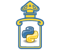

In [9]:
im = PIL.Image.open(BytesIO(base64.b64decode(b64)))
thumbnail = im.crop((0, 0, im.width, im.height-35)).resize((60, 50))
thumbnail

In [10]:
buffered = BytesIO()
thumbnail.save(buffered, format="PNG")
img_str = base64.b64encode(buffered.getvalue())
len(img_str)

3972

![](https://img.shields.io/static/v1?label=Pyrfume&message=abraham_2012&logo=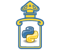&labelColor=ffffff&style=social)

In [11]:
z = f"data:image/png;base64,{img_str.decode('utf-8')}"
x = f"![](https://img.shields.io/static/v1?label=Pyrfume&message=abraham_2012&logo={z}&labelColor=ffffff&style=social)"
Markdown(x)